A numerical formula is said to be *unstable* if its error is greater than unit-roundoff (i.e. error due to the representation in floating point numbers).

An example of an *unstable* numerical formula is as follows:

$$
f_n(x):=\sqrt{x+\frac{1}{n} }-\sqrt{x}
$$

We have that $\varepsilon_n^f \stackrel{n \to +\infty}\longrightarrow 1 \gg \mathbf u$ (i.e. the relative error tends to become *way* creater than the error caused by the unit roundoff), due to a phenomenon called *catastrophic cancellation* (see [here](https://en.wikipedia.org/wiki/Catastrophic_cancellation) for more details).

We can *"correct"* this formula by rationalizing:

$$
f^\ast_n(x) = \frac{\frac{1}{n} }{\sqrt{x+\frac{1}{n} }+\sqrt{x} }
$$

Obviously $\forall (n,x) \in \mathbb N \times \mathbb R, f_n(x)=f^\ast_n(x)$. However $\varepsilon_n^{f^\ast} \leq \mathbf u, \forall n>0$.

To verify this we will write a Python script where we calculate the formula with these two functions, and calculate their result.

In [1]:
def f(x: float, n: int) -> float:
    return (x+1/n)**0.5 - x**0.5

def f_ast(x: float, n: int) -> float:
    return (1/n)/((x+1/n)**0.5 + x**0.5)

In [2]:
print(f(2,1e16))
print(f_ast(2, 1e16))

0.0
3.535533905932737e-17


Clearly we see that $f$ commits a $100\%$ error from $n \geq 10^{16}$ and does not work anymore, whereas it still "works" for $f^\ast$ it is still working.

---

Let us see another example. The following sequence is known for converging towards the irrational number $\pi$:
$$
(z_n)_{n \in \mathbb N} :=\left \{
\begin{align*}
& 2, n=1 \\
&2^{n-0.5}\sqrt{1-\sqrt{1-4^{1-n}z_{n-1}^2 } }, n > 1
\end{align*}
\right.
$$
Clearly $\lim_n 4^{1-n}z_n^2$ (the factor $z_n$ behaves like a constant due to its limit, i.e. it's $O(\pi)$). Therefore we have catastrophic cancellation for $n \to +\infty$, meaning that this formula virtually becomes impossible.


In [3]:

def z(n: int) -> float:
    if n == 1:
        return 2
    
    else:
        return 2**(n-0.5) * (1-(1-((1/4)**((-1+n))*(z(n-1)**2)))**0.5)**0.5
    


In [4]:
import matplotlib.pyplot as plt 
import numpy as np

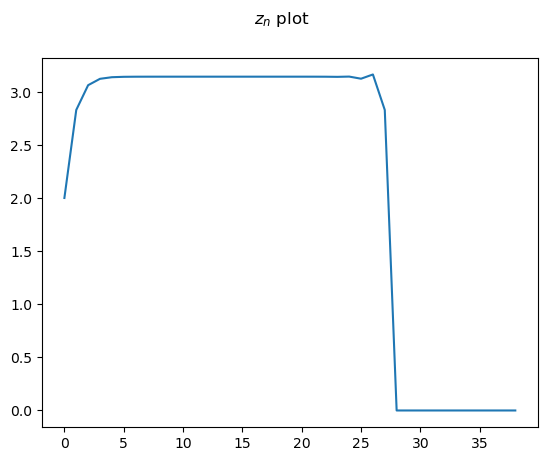

In [27]:
E = np.arange(1, 40, 1)

Z_E = [z(n) for n in E]

plt.plot(Z_E)
plt.suptitle("$z_n$ plot")
plt.show()

Clearly, at a certain point this formula "stops working" and it becomes 0. To formalize, with this formula $\exists n_0: \forall n \geq n_0, \operatorname{fl}{z_n} = 0$.


To correct it we just have to rationalize the expression for $z_{n>1}$:
$$
\forall n>1, z_n = 2^{n-0.5}\sqrt{\frac{4^{1-n}z_{n-1}^2}{1+\sqrt{1-4^{1-n}z_{n-1}^2} } }
$$


In [ ]:
def aux(n):
    return ((1/4)**(-1+n)) * ((z_corrected(n-1))**2)

def z_corrected(n: int) -> float:
    if n == 1:
        return 2
    
    else:
        aux_ = aux(n)
        return 2**(n-0.5) * (aux_/(1+(1-aux_)**0.5))**0.5

100%|██████████| 24/24 [04:46<00:00, 11.95s/it] 


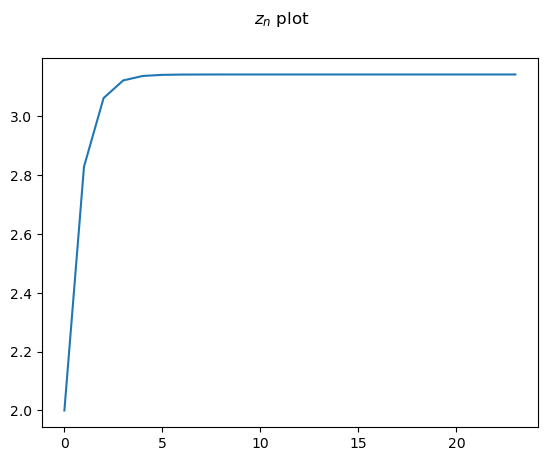

In [24]:
from tqdm import tqdm 

E = np.arange(1, 25, 1)

Z_E_C = [z_corrected(n) for n in tqdm(E)]

plt.plot(Z_E_C)
plt.suptitle("$z_n$ plot")
plt.show()